In [6]:
import pandas as pd
import numpy as np

In [8]:
# Introduction
# Data source: https://health.google.com/covid-19/open-data/raw-data?loc=MY
# Data: Aggregated table at specific region (choose Malaysia)

# 1. Import the data
statistic = pd.read_csv('C:/Users/USER/3D Objects/Data Science/Project 2/MY.csv',header=0)

In [859]:
statistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Columns: 165 entries, location_key to relative_humidity
dtypes: float64(123), int64(23), object(19)
memory usage: 1.2+ MB


In [861]:
# Checking attributes along with data types
for column in statistic.columns:
    print(f"Column: {column}, Data Type: {statistic[column].dtype}")

Column: location_key, Data Type: object
Column: date, Data Type: object
Column: place_id, Data Type: object
Column: wikidata_id, Data Type: object
Column: datacommons_id, Data Type: object
Column: country_code, Data Type: object
Column: country_name, Data Type: object
Column: iso_3166_1_alpha_2, Data Type: object
Column: iso_3166_1_alpha_3, Data Type: object
Column: aggregation_level, Data Type: int64
Column: new_confirmed, Data Type: float64
Column: new_deceased, Data Type: float64
Column: new_recovered, Data Type: float64
Column: new_tested, Data Type: float64
Column: cumulative_confirmed, Data Type: float64
Column: cumulative_deceased, Data Type: float64
Column: cumulative_recovered, Data Type: float64
Column: cumulative_tested, Data Type: float64
Column: new_hospitalized_patients, Data Type: float64
Column: cumulative_hospitalized_patients, Data Type: float64
Column: current_hospitalized_patients, Data Type: float64
Column: current_intensive_care_patients, Data Type: float64
Column

In [863]:
statistic['location_key'].unique()

array(['MY'], dtype=object)

In [865]:
# 2. Choose suitable attributes only
statistics = statistic[['date', 'new_confirmed', 'new_deceased', 'new_recovered',
                        'new_tested',
                        'new_persons_fully_vaccinated','school_closing','workplace_closing',
                        'cancel_public_events','restrictions_on_gatherings',
                        'public_transport_closing', 'stay_at_home_requirements', 
                        'restrictions_on_internal_movement', 'international_travel_controls',
                        'income_support','debt_relief', 'public_information_campaigns',
                        'testing_policy','contact_tracing', 'facial_coverings',
                        'vaccination_policy', 'stringency_index']]

In [867]:
# 4. Handle missing values
# Find columns with NA values
na_columns = statistics.columns[statistics.isna().any()].tolist()

# Print the columns
print("Columns with NA values:", na_columns)

# Optional: Count the number of NA values in each column
na_counts = statistics.isna().sum()
print(na_counts[na_counts > 0])  # Only show columns with NA values

Columns with NA values: ['new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'new_persons_fully_vaccinated', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'international_travel_controls', 'income_support', 'debt_relief', 'public_information_campaigns', 'testing_policy', 'contact_tracing', 'facial_coverings', 'vaccination_policy', 'stringency_index']
new_confirmed                          2
new_deceased                           2
new_recovered                         26
new_tested                            24
new_persons_fully_vaccinated         423
school_closing                        54
workplace_closing                     54
cancel_public_events                  54
restrictions_on_gatherings            54
public_transport_closing              54
stay_at_home_requirements             54
restrictions_on_internal_movement     54
int

In [869]:
statistics.tail()

,date,new_confirmed,new_deceased,new_recovered,new_tested,new_persons_fully_vaccinated,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,public_information_campaigns,testing_policy,contact_tracing,facial_coverings,vaccination_policy,stringency_index
986,2022-09-13,1942.0,6.0,2276.0,33929.0,332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,2022-09-14,2431.0,5.0,1820.0,0.0,254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,2022-09-15,2375.0,3.0,1466.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,2022-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,2022-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [871]:
# Ensure data consistency
statistics = statistics.drop(index=range(937, 991)) 

In [873]:
statistics = statistics.drop(index=range(0, 23))

In [875]:
# Replace NA with zero values: indicates even not started yet
statistics.fillna(0, inplace=True)

In [877]:
# Check for duplicates
statistics_duplicates = statistics.duplicated().sum()

In [879]:
# 6. Factorization
# A. Factor the date
statistics['date'] = pd.to_datetime(statistics['date'])

In [881]:
statistics['date']

23    2020-01-24
24    2020-01-25
25    2020-01-26
26    2020-01-27
27    2020-01-28
         ...    
932   2022-07-21
933   2022-07-22
934   2022-07-23
935   2022-07-24
936   2022-07-25
Name: date, Length: 914, dtype: datetime64[ns]

In [883]:
statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 23 to 936
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   date                               914 non-null    datetime64[ns]
 1   new_confirmed                      914 non-null    float64       
 2   new_deceased                       914 non-null    float64       
 3   new_recovered                      914 non-null    float64       
 4   new_tested                         914 non-null    float64       
 5   new_persons_fully_vaccinated       914 non-null    float64       
 6   school_closing                     914 non-null    float64       
 7   workplace_closing                  914 non-null    float64       
 8   cancel_public_events               914 non-null    float64       
 9   restrictions_on_gatherings         914 non-null    float64       
 10  public_transport_closing           91

In [885]:
statistics['testing_policy'].unique()

array([1., 3.])

In [887]:
# Mapping factors for categorical variables
def map_factors(df, column, mapping):
    df[column] = df[column].map(mapping).astype('category')

In [889]:
map_factors(statistics, 'school_closing', {0: 'None', 1: 'Recommend', 2: 'Some', 3: 'All'})
map_factors(statistics, 'workplace_closing', {0: 'None', 1: 'Recommend', 2: 'Some', 3: 'All'})
map_factors(statistics, 'cancel_public_events', {0: ':None', 1: 'Recommend', 2: 'All'})
map_factors(statistics, 'restrictions_on_gatherings', {0: 'None', 1: '<1000', 2: '<100', 
                                                        3: '<10', 4: 'Any Size'})
map_factors(statistics, 'public_transport_closing', {0: 'None', 1: 'Recommend', 2: 'Closing'})
map_factors(statistics, 'stay_at_home_requirements', {0: 'None', 1: 'Recommend', 
                                                      2: 'Exceptions', 3: 'Strict'})
map_factors(statistics, 'restrictions_on_internal_movement', {0: 'None', 1: 'State/District', 
                                                              2: 'Country'})
map_factors(statistics, 'international_travel_controls', {0: 'None', 2: 'Screening', 
                                                           3: 'Quarantine', 4: 'Ban'})
map_factors(statistics, 'income_support', {0: 'No', 1: 'Yes'})
map_factors(statistics, 'debt_relief', {0: 'No', 2: 'Yes'})
map_factors(statistics, 'public_information_campaigns', {0: 'No', 2: 'Yes'})
map_factors(statistics, 'testing_policy', {1: 'Limited', 3: 'Open'})
map_factors(statistics, 'contact_tracing', {0: 'None', 1: 'Limited', 2: 'Comprehensive'})
map_factors(statistics, 'facial_coverings', {0: 'None', 2: 'Certain Settings', 3: 'Most Settings'})
map_factors(statistics, 'vaccination_policy', {0: 'None', 1: 'Certain Groups', 
                                                2: 'Vulnerable Groups', 3: 'All', 
                                                4: 'Mandatory', 5: 'Booster'})

In [891]:
# Load library
import matplotlib.pyplot as plt #for plot
import matplotlib.patches as patches #put everything in one ?
import numpy as np
import pandas as pd
import seaborn as sns #package for plotting

In [893]:
for column in statistics.columns:
    print(column)

date
new_confirmed
new_deceased
new_recovered
new_tested
new_persons_fully_vaccinated
school_closing
workplace_closing
cancel_public_events
restrictions_on_gatherings
public_transport_closing
stay_at_home_requirements
restrictions_on_internal_movement
international_travel_controls
income_support
debt_relief
public_information_campaigns
testing_policy
contact_tracing
facial_coverings
vaccination_policy
stringency_index


In [895]:
# Adding new columns for positive test percentage and case fatality ratio
statistics['positive_test_percentage'] = ((statistics['new_confirmed'] / statistics['new_tested']) * 100).round(2)
statistics['case_fatality_percentage'] = ((statistics['new_deceased'] / statistics['new_confirmed']) * 100).round(2)

In [897]:
statistics.isna().sum()

date                                  0
new_confirmed                         0
new_deceased                          0
new_recovered                         0
new_tested                            0
new_persons_fully_vaccinated          0
school_closing                        0
workplace_closing                     0
cancel_public_events                  0
restrictions_on_gatherings            0
public_transport_closing              0
stay_at_home_requirements             0
restrictions_on_internal_movement     0
international_travel_controls         0
income_support                        0
debt_relief                           0
public_information_campaigns          0
testing_policy                        0
contact_tracing                       0
facial_coverings                      0
vaccination_policy                    0
stringency_index                      0
positive_test_percentage              0
case_fatality_percentage             23
dtype: int64

In [899]:
# 0/0 = NaN
statistics['case_fatality_percentage'] = statistics['case_fatality_percentage'].fillna(0)

In [901]:
statistics

,date,new_confirmed,new_deceased,new_recovered,new_tested,new_persons_fully_vaccinated,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,public_information_campaigns,testing_policy,contact_tracing,facial_coverings,vaccination_policy,stringency_index,positive_test_percentage,case_fatality_percentage
23,2020-01-24,4.0,0.0,0.0,2.0,0.0,None,None,:None,None,None,None,None,None,No,No,Yes,Limited,Comprehensive,None,None,11.11,200.00,0.00
24,2020-01-25,4.0,0.0,0.0,5.0,0.0,None,None,:None,None,None,None,None,None,No,No,Yes,Limited,Comprehensive,None,None,11.11,80.00,0.00
25,2020-01-26,0.0,0.0,0.0,14.0,0.0,None,None,:None,None,None,None,None,None,No,No,Yes,Limited,Comprehensive,None,None,11.11,0.00,0.00
26,2020-01-27,0.0,0.0,0.0,24.0,0.0,None,None,:None,None,None,None,None,None,No,No,Yes,Limited,Comprehensive,None,None,11.11,0.00,0.00
27,2020-01-28,0.0,0.0,0.0,53.0,0.0,None,None,:None,None,None,None,None,None,No,No,Yes,Limited,Comprehensive,None,None,11.11,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2022-07-21,4587.0,10.0,2652.0,47324.0,5614.0,Recommend,Recommend,Recommend,<1000,Recommend,Recommend,State/District,Screening,Yes,Yes,Yes,Open,Limited,Certain Settings,Booster,47.22,9.69,0.22
933,2022-07-22,3880.0,14.0,2607.0,37934.0,9132.0,Recommend,Recommend,Recommend,<1000,Recommend,Recommend,State/District,Screening,Yes,Yes,Yes,Open,Limited,Certain Settings,Booster,47.22,10.23,0.36
934,2022-07-23,4816.0,9.0,3928.0,30939.0,8068.0,Recommend,Recommend,Recommend,<1000,Recommend,Recommend,State/District,Screening,Yes,Yes,Yes,Open,Limited,Certain Settings,Booster,47.22,15.57,0.19
935,2022-07-24,2720.0,3.0,4012.0,36972.0,4582.0,Recommend,Recommend,Recommend,<1000,Recommend,Recommend,State/District,Screening,Yes,Yes,Yes,Open,Limited,Certain Settings,Booster,47.22,7.36,0.11


In [903]:
# Load library
import matplotlib.pyplot as plt #for plot
import matplotlib.patches as patches #put everything in one ?
import numpy as np
import pandas as pd
import seaborn as sns #package for plotting

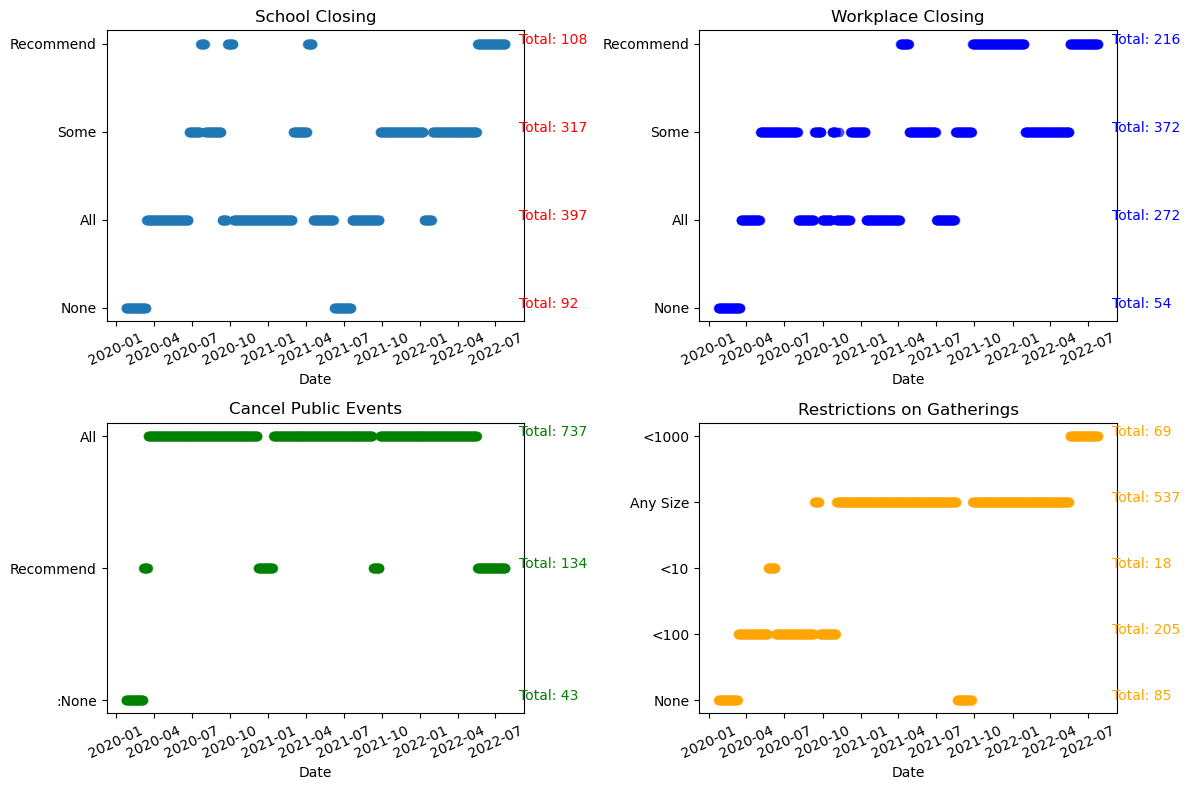

In [905]:
# Create a 2x2 subplot grid
plt.figure(figsize=(12, 8))  # Set figure size

# Add subplots
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

# Plot for school_closing
ax1.scatter(statistics['date'], statistics['school_closing'], alpha=0.6, label='Data Points')
ax1.set_title('School Closing')
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', rotation=25, labelsize=10)

# Add count annotations for school_closing
counts_school_closing = statistics.groupby('school_closing', observed=False).size()
for level, count in counts_school_closing.items():
    ax1.annotate(f'Total: {count}', 
                 xy=(statistics['date'].iloc[-1], level),  # Place annotation near last date
                 xytext=(10, 0),  # Offset annotation
                 textcoords='offset points', 
                 fontsize=10, color='red')

# Plot for workplace_closing
ax2.scatter(statistics['date'], statistics['workplace_closing'], alpha=0.6, label='Data Points', color='blue')
ax2.set_title('Workplace Closing')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=25, labelsize=10)

# Add count annotations for workplace_closing
counts_workplace_closing = statistics.groupby('workplace_closing', observed=False).size()
for level, count in counts_workplace_closing.items():
    ax2.annotate(f'Total: {count}', 
                 xy=(statistics['date'].iloc[-1], level),  # Place annotation near last date
                 xytext=(10, 0),  # Offset annotation
                 textcoords='offset points', 
                 fontsize=10, color='blue')

# Plot for cancel_public_events
ax3.scatter(statistics['date'], statistics['cancel_public_events'], alpha=0.6, label='Data Points', color='green')
ax3.set_title('Cancel Public Events')
ax3.set_xlabel('Date')
ax3.tick_params(axis='x', rotation=25, labelsize=10)

# Add count annotations for cancel_public_events
counts_cancel_public_events = statistics.groupby('cancel_public_events', observed=False).size()
for level, count in counts_cancel_public_events.items():
    ax3.annotate(f'Total: {count}', 
                 xy=(statistics['date'].iloc[-1], level),  # Place annotation near last date
                 xytext=(10, 0),  # Offset annotation
                 textcoords='offset points', 
                 fontsize=10, color='green')

# Plot for restrictions_on_gatherings
ax4.scatter(statistics['date'], statistics['restrictions_on_gatherings'], alpha=0.6, label='Data Points', color='orange')
ax4.set_title('Restrictions on Gatherings')
ax4.set_xlabel('Date')
ax4.tick_params(axis='x', rotation=25, labelsize=10)

# Add count annotations for restrictions_on_gatherings
counts_restrictions_on_gatherings = statistics.groupby('restrictions_on_gatherings', observed=False).size()
for level, count in counts_restrictions_on_gatherings.items():
    ax4.annotate(f'Total: {count}', 
                 xy=(statistics['date'].iloc[-1], level),  # Place annotation near last date
                 xytext=(10, 0),  # Offset annotation
                 textcoords='offset points', 
                 fontsize=10, color='orange')

# Adjust layout and show the plot
plt.tight_layout()
#plt.show()
# Save the plot as a PNG file
#plt.savefig('C:/Users/USER/3D Objects/Data Science/Project 2/plot7.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

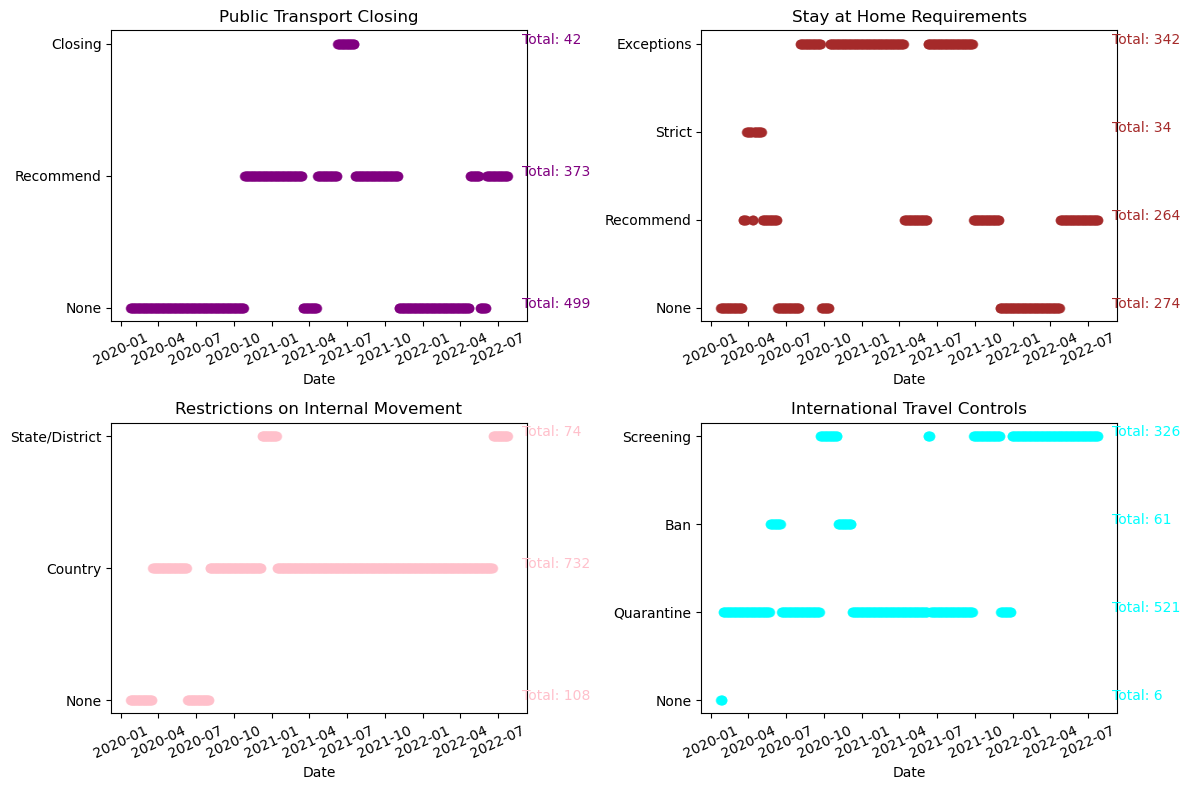

In [907]:
# Create a 2x2 subplot grid for the new variables
plt.figure(figsize=(12, 8))  # Set figure size

# Add subplots
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

# Plot for public_transport_closing
ax1.scatter(statistics['date'], statistics['public_transport_closing'], alpha=0.6, label='Data Points', color='purple')
ax1.set_title('Public Transport Closing')
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', rotation=25, labelsize=10)

# Add count annotations for public_transport_closing
counts_public_transport_closing = statistics.groupby('public_transport_closing', observed=False).size()
for level, count in counts_public_transport_closing.items():
    ax1.annotate(f'Total: {count}', 
                 xy=(statistics['date'].iloc[-1], level),  # Place annotation near last date
                 xytext=(10, 0),  # Offset annotation
                 textcoords='offset points', 
                 fontsize=10, color='purple')

# Plot for stay_at_home_requirements
ax2.scatter(statistics['date'], statistics['stay_at_home_requirements'], alpha=0.6, label='Data Points', color='brown')
ax2.set_title('Stay at Home Requirements')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=25, labelsize=10)

# Add count annotations for stay_at_home_requirements
counts_stay_at_home_requirements = statistics.groupby('stay_at_home_requirements', observed=False).size()
for level, count in counts_stay_at_home_requirements.items():
    ax2.annotate(f'Total: {count}', 
                 xy=(statistics['date'].iloc[-1], level),  # Place annotation near last date
                 xytext=(10, 0),  # Offset annotation
                 textcoords='offset points', 
                 fontsize=10, color='brown')

# Plot for restrictions_on_internal_movement
ax3.scatter(statistics['date'], statistics['restrictions_on_internal_movement'], alpha=0.6, label='Data Points', color='pink')
ax3.set_title('Restrictions on Internal Movement')
ax3.set_xlabel('Date')
ax3.tick_params(axis='x', rotation=25, labelsize=10)

# Add count annotations for restrictions_on_internal_movement
counts_restrictions_on_internal_movement = statistics.groupby('restrictions_on_internal_movement', observed=False).size()
for level, count in counts_restrictions_on_internal_movement.items():
    ax3.annotate(f'Total: {count}', 
                 xy=(statistics['date'].iloc[-1], level),  # Place annotation near last date
                 xytext=(10, 0),  # Offset annotation
                 textcoords='offset points', 
                 fontsize=10, color='pink')

# Plot for international_travel_controls
ax4.scatter(statistics['date'], statistics['international_travel_controls'], alpha=0.6, label='Data Points', color='cyan')
ax4.set_title('International Travel Controls')
ax4.set_xlabel('Date')
ax4.tick_params(axis='x', rotation=25, labelsize=10)

# Add count annotations for international_travel_controls
counts_international_travel_controls = statistics.groupby('international_travel_controls', observed=False).size()
for level, count in counts_international_travel_controls.items():
    ax4.annotate(f'Total: {count}', 
                 xy=(statistics['date'].iloc[-1], level),  # Place annotation near last date
                 xytext=(10, 0),  # Offset annotation
                 textcoords='offset points', 
                 fontsize=10, color='cyan')

# Adjust layout and show the plot
plt.tight_layout()
#plt.show()
# Save the plot as a PNG file
#plt.savefig('C:/Users/USER/3D Objects/Data Science/Project 2/plot8.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

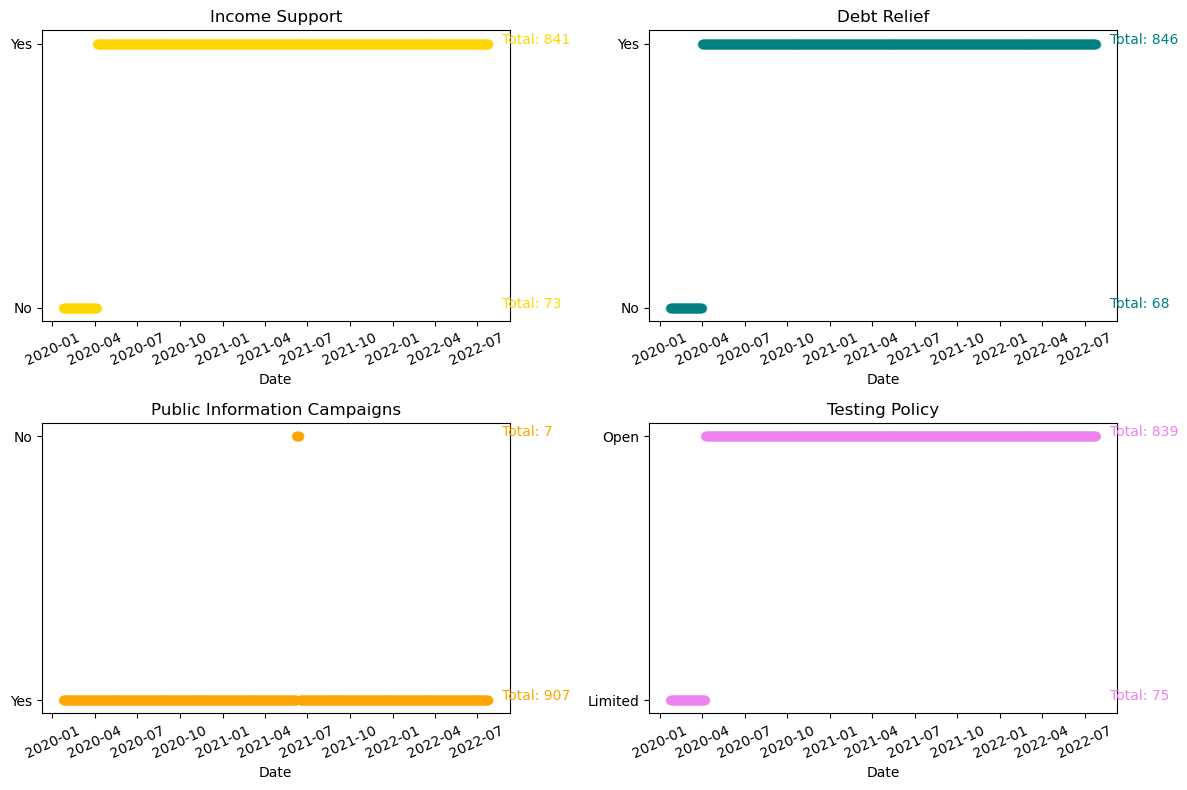

In [909]:
# Create a 2x2 subplot grid for the new variables
plt.figure(figsize=(12, 8))  # Set figure size

# Add subplots
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

# Plot for income_support
ax1.scatter(statistics['date'], statistics['income_support'], alpha=0.6, label='Data Points', color='gold')
ax1.set_title('Income Support')
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', rotation=25, labelsize=10)

# Add count annotations for income_support
counts_income_support = statistics.groupby('income_support', observed=False).size()
for level, count in counts_income_support.items():
    ax1.annotate(f'Total: {count}', 
                 xy=(statistics['date'].iloc[-1], level),  # Place annotation near last date
                 xytext=(10, 0),  # Offset annotation
                 textcoords='offset points', 
                 fontsize=10, color='gold')

# Plot for debt_relief
ax2.scatter(statistics['date'], statistics['debt_relief'], alpha=0.6, label='Data Points', color='teal')
ax2.set_title('Debt Relief')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=25, labelsize=10)

# Add count annotations for debt_relief
counts_debt_relief = statistics.groupby('debt_relief', observed=False).size()
for level, count in counts_debt_relief.items():
    ax2.annotate(f'Total: {count}', 
                 xy=(statistics['date'].iloc[-1], level),  # Place annotation near last date
                 xytext=(10, 0),  # Offset annotation
                 textcoords='offset points', 
                 fontsize=10, color='teal')

# Plot for public_information_campaigns
ax3.scatter(statistics['date'], statistics['public_information_campaigns'], alpha=0.6, label='Data Points', color='orange')
ax3.set_title('Public Information Campaigns')
ax3.set_xlabel('Date')
ax3.tick_params(axis='x', rotation=25, labelsize=10)

# Add count annotations for public_information_campaigns
counts_public_information_campaigns = statistics.groupby('public_information_campaigns', observed=False).size()
for level, count in counts_public_information_campaigns.items():
    ax3.annotate(f'Total: {count}', 
                 xy=(statistics['date'].iloc[-1], level),  # Place annotation near last date
                 xytext=(10, 0),  # Offset annotation
                 textcoords='offset points', 
                 fontsize=10, color='orange')

# Plot for testing_policy
ax4.scatter(statistics['date'], statistics['testing_policy'], alpha=0.6, label='Data Points', color='violet')
ax4.set_title('Testing Policy')
ax4.set_xlabel('Date')
ax4.tick_params(axis='x', rotation=25, labelsize=10)

# Add count annotations for testing_policy
counts_testing_policy = statistics.groupby('testing_policy', observed=False).size()
for level, count in counts_testing_policy.items():
    ax4.annotate(f'Total: {count}', 
                 xy=(statistics['date'].iloc[-1], level),  # Place annotation near last date
                 xytext=(10, 0),  # Offset annotation
                 textcoords='offset points', 
                 fontsize=10, color='violet')

# Adjust layout and show the plot
plt.tight_layout()
#plt.show()
# Save the plot as a PNG file
#plt.savefig('C:/Users/USER/3D Objects/Data Science/Project 2/plot9.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

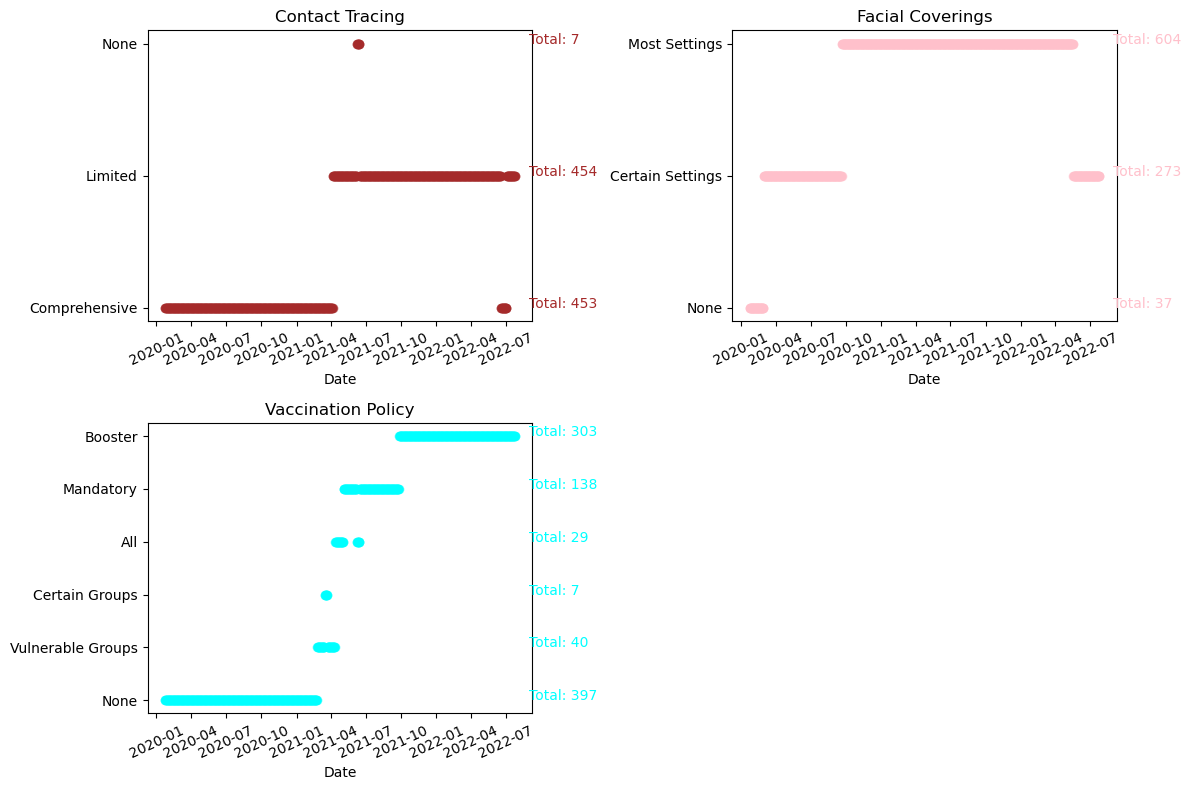

In [911]:
# Create a 2x2 subplot grid for the new variables
plt.figure(figsize=(12, 8))  # Set figure size

# Add subplots
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)

# Plot for contact_tracing
ax1.scatter(statistics['date'], statistics['contact_tracing'], alpha=0.6, label='Data Points', color='brown')
ax1.set_title('Contact Tracing')
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', rotation=25, labelsize=10)

# Add count annotations for contact_tracing
counts_contact_tracing = statistics.groupby('contact_tracing', observed=False).size()
for level, count in counts_contact_tracing.items():
    ax1.annotate(f'Total: {count}', 
                 xy=(statistics['date'].iloc[-1], level),  # Place annotation near last date
                 xytext=(10, 0),  # Offset annotation
                 textcoords='offset points', 
                 fontsize=10, color='brown')

# Plot for facial_coverings
ax2.scatter(statistics['date'], statistics['facial_coverings'], alpha=0.6, label='Data Points', color='pink')
ax2.set_title('Facial Coverings')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=25, labelsize=10)

# Add count annotations for facial_coverings
counts_facial_coverings = statistics.groupby('facial_coverings', observed=False).size()
for level, count in counts_facial_coverings.items():
    ax2.annotate(f'Total: {count}', 
                 xy=(statistics['date'].iloc[-1], level),  # Place annotation near last date
                 xytext=(10, 0),  # Offset annotation
                 textcoords='offset points', 
                 fontsize=10, color='pink')

# Plot for vaccination_policy
ax3.scatter(statistics['date'], statistics['vaccination_policy'], alpha=0.6, label='Data Points', color='cyan')
ax3.set_title('Vaccination Policy')
ax3.set_xlabel('Date')
ax3.tick_params(axis='x', rotation=25, labelsize=10)

# Add count annotations for vaccination_policy
counts_vaccination_policy = statistics.groupby('vaccination_policy', observed=False).size()
for level, count in counts_vaccination_policy.items():
    ax3.annotate(f'Total: {count}', 
                 xy=(statistics['date'].iloc[-1], level),  # Place annotation near last date
                 xytext=(10, 0),  # Offset annotation
                 textcoords='offset points', 
                 fontsize=10, color='cyan')

# Adjust layout and show the plot
plt.tight_layout()
#plt.show()
# Save the plot as a PNG file
#plt.savefig('C:/Users/USER/3D Objects/Data Science/Project 2/plot10.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

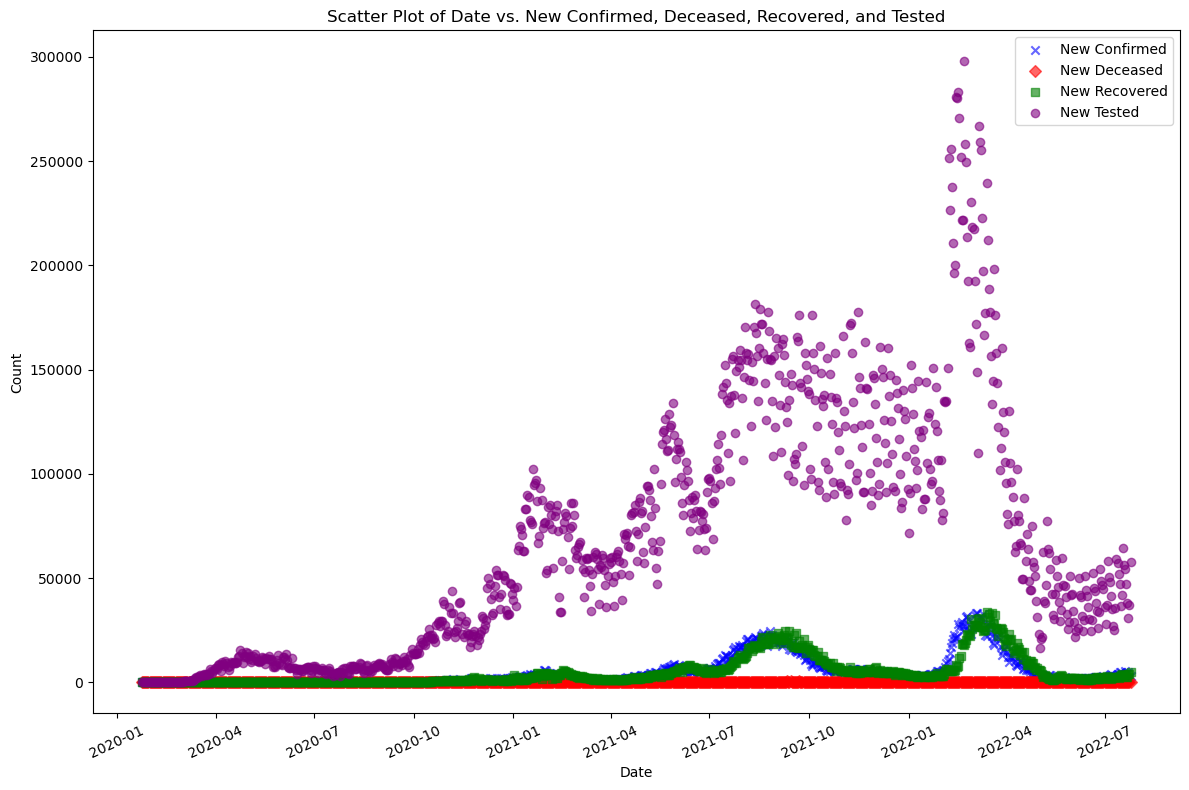

In [913]:
# Scatter plot for continous variable on one plot
plt.figure(figsize=(12, 8))

# Plot for new_confirmed
plt.scatter(statistics['date'], statistics['new_confirmed'], alpha=0.6, label='New Confirmed', color='blue', marker='x')

# Plot for new_deceased
plt.scatter(statistics['date'], statistics['new_deceased'], alpha=0.6, label='New Deceased', color='red',marker='D')

# Plot for new_recovered
plt.scatter(statistics['date'], statistics['new_recovered'], alpha=0.6, label='New Recovered', color='green',marker='s')

# Plot for new_tested
plt.scatter(statistics['date'], statistics['new_tested'], alpha=0.6, label='New Tested', color='purple')

# Customize plot appearance
plt.xticks(rotation=25, fontsize=10)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Scatter Plot of Date vs. New Confirmed, Deceased, Recovered, and Tested')
plt.legend()

# Show the plot
plt.tight_layout()
#plt.show()
# Save the plot as a PNG file
#plt.savefig('C:/Users/USER/3D Objects/Data Science/Project 2/plot1.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

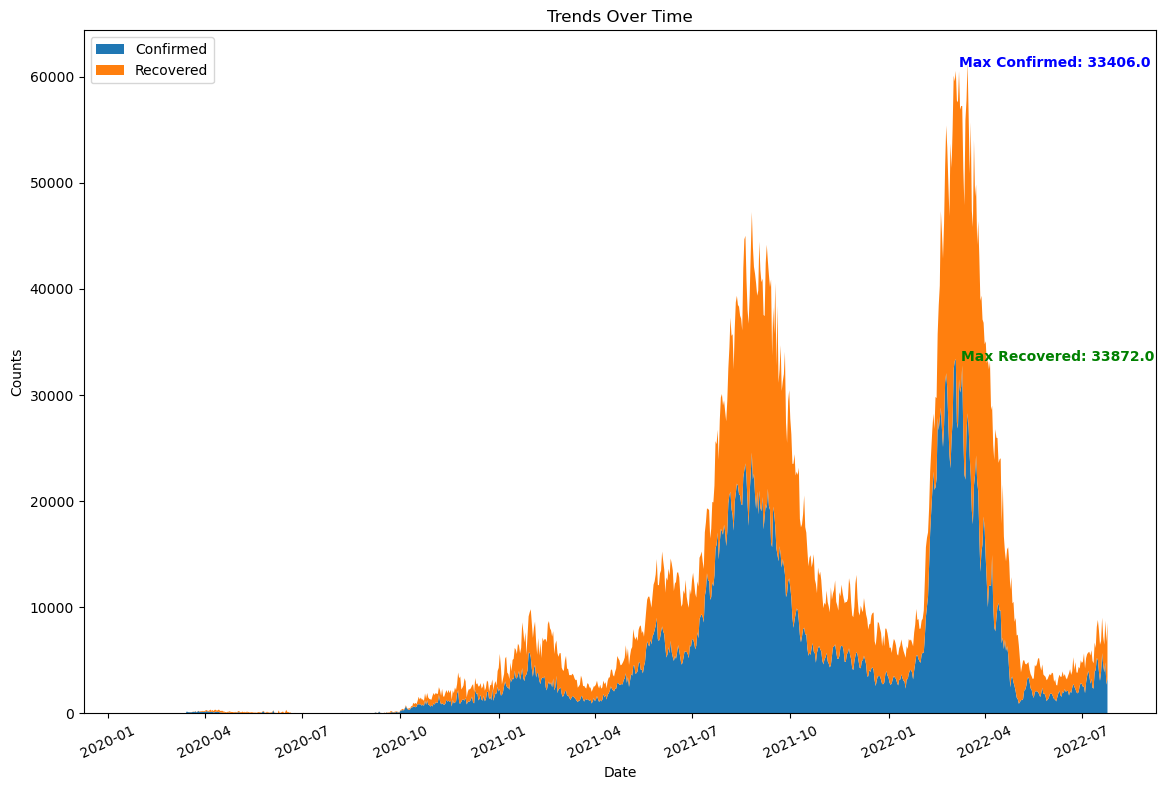

In [915]:
# Create the stackplot
plt.stackplot(statistics['date'], 
              statistics['new_confirmed'], 
              statistics['new_recovered'], 
              labels=['Confirmed', 'Recovered'])

# Find the maximum value
max_confirmed = statistics['new_confirmed'].max()
max_recovered = statistics['new_recovered'].max()

# Get the corresponding dates for the max values
max_date_confirmed = statistics['date'][statistics['new_confirmed'].idxmax()]
max_date_recovered = statistics['date'][statistics['new_recovered'].idxmax()]

# Annotate the maximum values on the stack plot
plt.annotate(f'Max Confirmed: {max_confirmed}', 
             xy=(max_date_confirmed, max_confirmed), 
             xytext=(2, 210),  # Offset for visibility
             textcoords='offset points',
             fontsize=10, color='blue', fontweight='bold')

plt.annotate(f'Max Recovered: {max_recovered}', 
             xy=(max_date_recovered, max_recovered), 
             xytext=(-3, -5),  # Offset for visibility
             textcoords='offset points',
             fontsize=10, color='green', fontweight='bold')

# Customize the plot
plt.legend(loc='upper left')
plt.title('Trends Over Time')
plt.xticks(rotation=25, fontsize=10)
plt.xlabel('Date')
plt.ylabel('Counts')

# Show the plot
plt.tight_layout()
#plt.show()

# Save the plot as a PNG file
#plt.savefig('C:/Users/USER/3D Objects/Data Science/Project 2/plot2.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

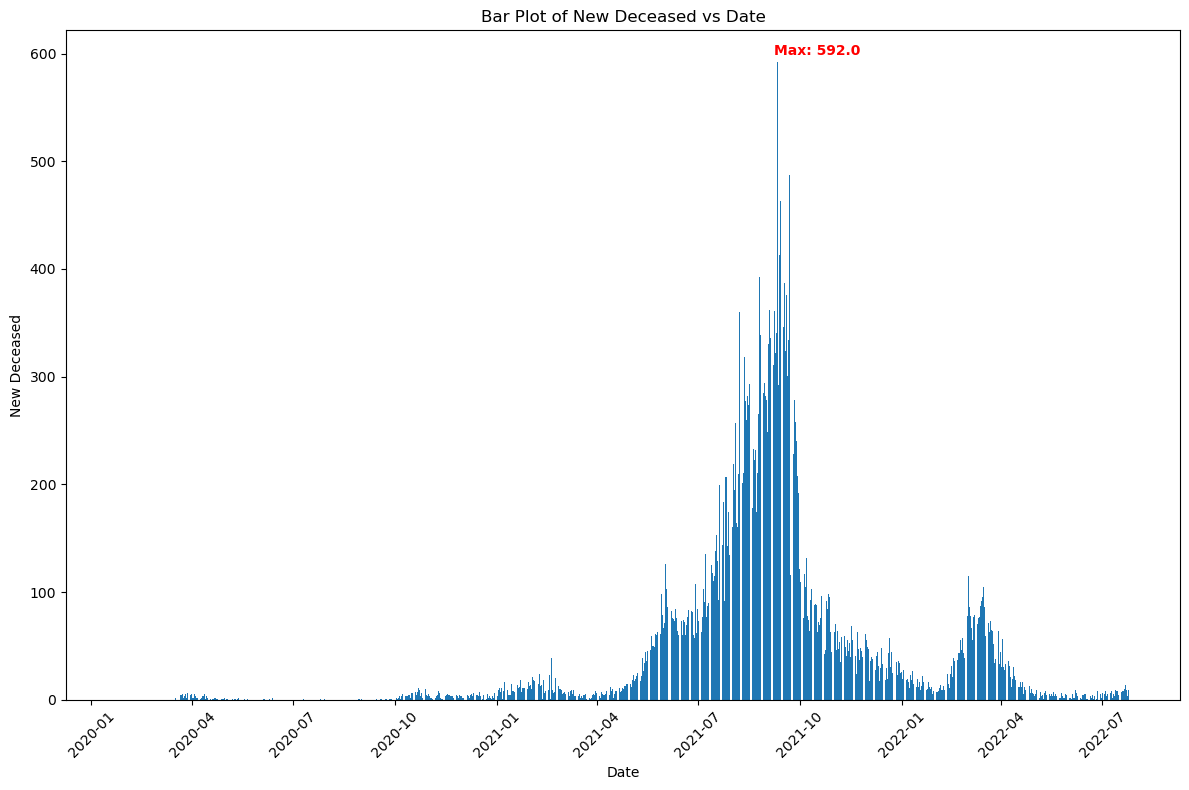

In [917]:
# Plot bar chart for New Deceased vs Date
plt.bar(statistics['date'], statistics['new_deceased'])

# Annotate the highest count
max_value = statistics['new_deceased'].max()
max_index = statistics['new_deceased'].idxmax()  # Get the index of the maximum value
max_date = statistics['date'].iloc[max_index]

# Annotate on the plot
plt.annotate(f'Max: {max_value}', 
             xy=(max_date, max_value),  # Position of the annotation
             xytext=(10, 5),  # Offset for better visibility
             textcoords='offset points',
             fontsize=10, color='red', fontweight='bold', ha='center')

# Customize plot appearance
plt.xticks(rotation=45, fontsize=10)  # Adjust x-axis labels
plt.xlabel('Date')
plt.ylabel('New Deceased')
plt.title('Bar Plot of New Deceased vs Date')

# Display the plot
plt.tight_layout()
#plt.show()

# Save the plot as a PNG file
#plt.savefig('C:/Users/USER/3D Objects/Data Science/Project 2/plot3.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

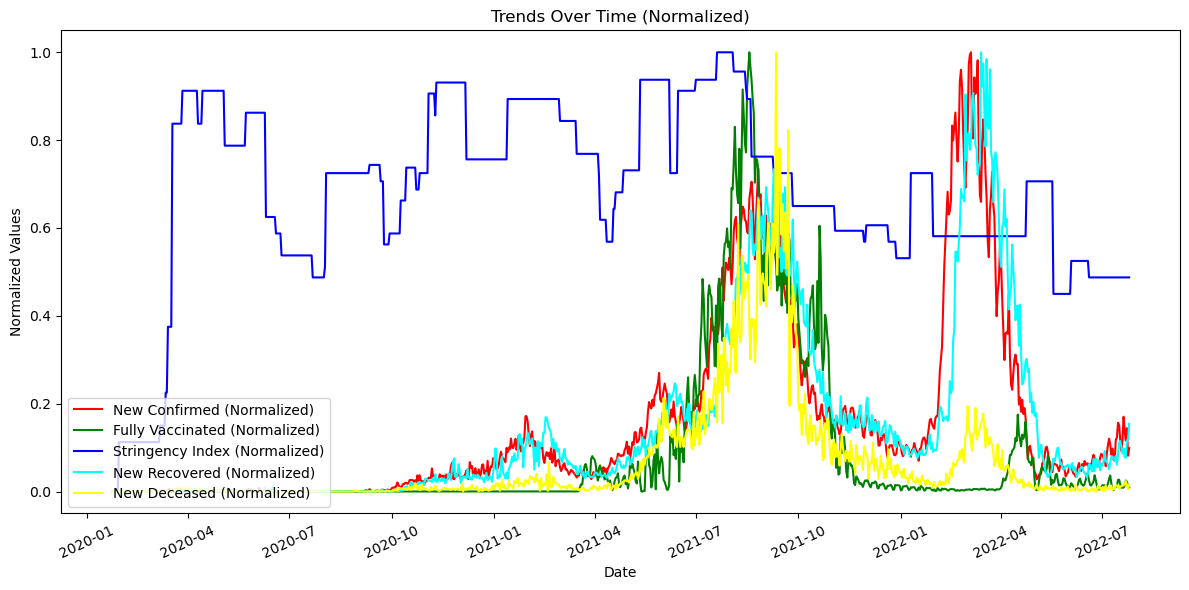

In [919]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to normalize
columns_to_normalize = ['new_confirmed', 'new_persons_fully_vaccinated', 'stringency_index','new_recovered','new_deceased']
scaler = MinMaxScaler()

# Normalize and add back to the DataFrame
statistics_normalized = statistics.copy()
statistics_normalized[columns_to_normalize] = scaler.fit_transform(statistics[columns_to_normalize])

plt.figure(figsize=(12, 6))

# Plot normalized trends
plt.plot(statistics['date'], statistics_normalized['new_confirmed'], label='New Confirmed (Normalized)', color='red')
plt.plot(statistics['date'], statistics_normalized['new_persons_fully_vaccinated'], label='Fully Vaccinated (Normalized)', color='green')
plt.plot(statistics['date'], statistics_normalized['stringency_index'], label='Stringency Index (Normalized)', color='blue')
plt.plot(statistics['date'], statistics_normalized['new_recovered'], label='New Recovered (Normalized)', color='cyan')
plt.plot(statistics['date'], statistics_normalized['new_deceased'], label='New Deceased (Normalized)', color='yellow')

# Customize plot
plt.title('Trends Over Time (Normalized)')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend(loc='lower left')
plt.xticks(rotation=25)
plt.tight_layout()
#plt.show()

# Save the plot as a PNG file
#plt.savefig('C:/Users/USER/3D Objects/Data Science/Project 2/plot4.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

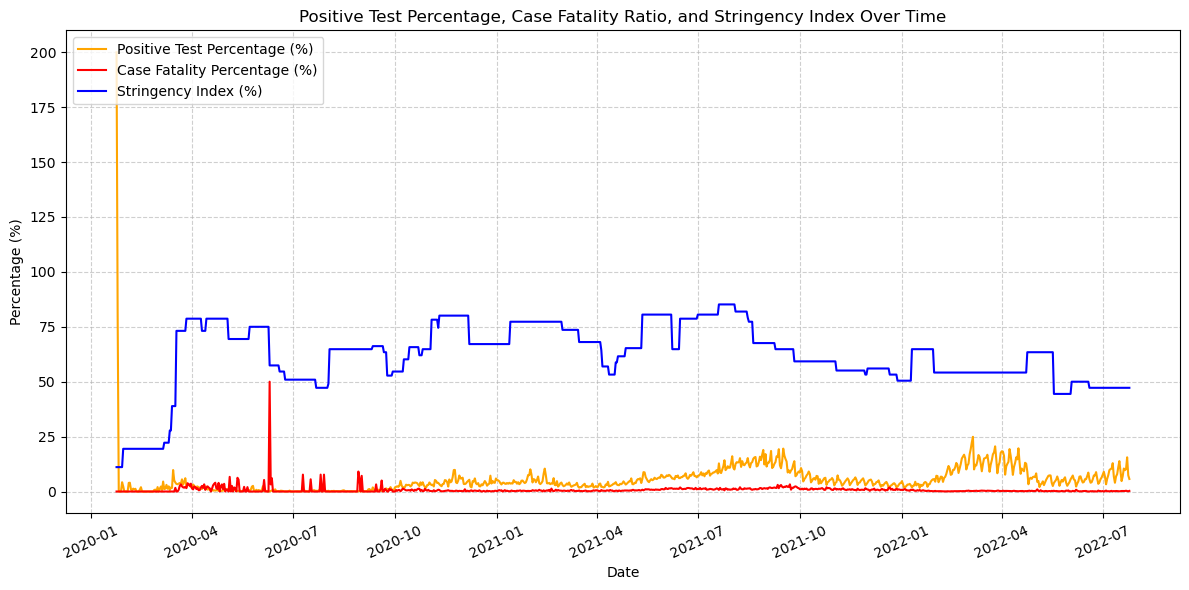

In [921]:
# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot Positive Test Percentage
plt.plot(statistics['date'], statistics['positive_test_percentage'], label='Positive Test Percentage (%)', color='orange')

# Plot Case Fatality Percentage
plt.plot(statistics['date'], statistics['case_fatality_percentage'], label='Case Fatality Percentage (%)', color='red')

# Plot Stringency Index
plt.plot(statistics['date'], statistics['stringency_index'], label='Stringency Index (%)', color='blue')

# Customize the plot
plt.title('Positive Test Percentage, Case Fatality Ratio, and Stringency Index Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=25)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
#plt.show()
# Save the plot as a PNG file
#plt.savefig('C:/Users/USER/3D Objects/Data Science/Project 2/plot11.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()